SENTIMENT ANALYSIS IN PYTHON

In this notebook  I will be exploring amazon food reviews by using NLP and the NLTK in python 
We will be using three different technqiues :
- VADER
- Roberta Pretrained Model
- Logistic Regresison TF-IDF

STEP 1 : NLTK BASICS and READING IN DATA 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import nltk


In [3]:
# READ IN DATA
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

# For this case we will sampling our data to work with a smaller dataset
df = df.head(5000)
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron

True

In [4]:
df.head()
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# SOME EDA


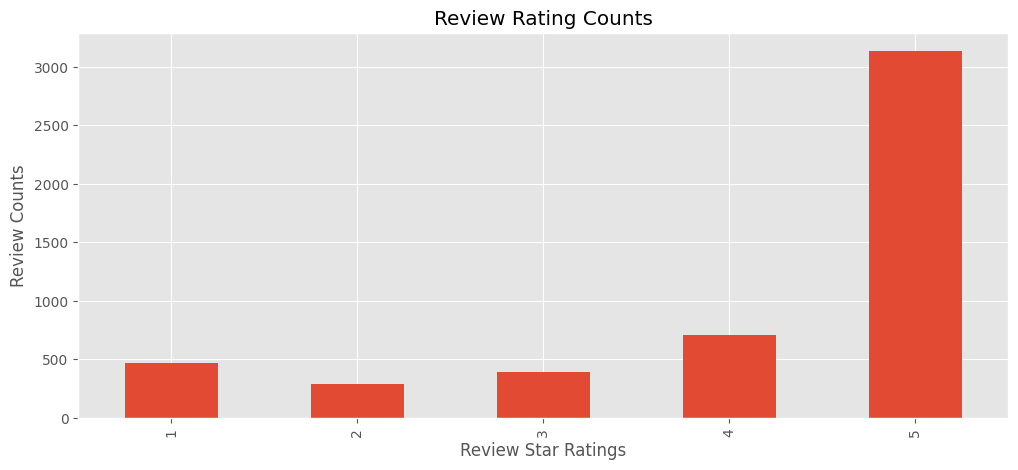

In [43]:
ax = df.Score.value_counts().sort_index().plot(kind = 'bar', title = "Review Rating Counts",
                                          figsize = (12,5))
ax.set_xlabel('Review Star Ratings')
ax.set_ylabel('Review Counts')
plt.show()

## Basic usage of NLTK and what it can be used for 

In [6]:
example = df.Text[50]
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [8]:
tokens = nltk.word_tokenize(example)
tokens[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [9]:
# THIS WILL GROUP THE CHUNKS OF TEXT VIA ENTITY 
entity = nltk.chunk.ne_chunk(tagged)
entity.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## STEP 2. VADER SENTIMENT SCORING
We will use NLTK's SentimentInensityAnalyzer to get the neg/neu/pos/scores of the text

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Sentiment Analyzer Obj
sia = SentimentIntensityAnalyzer()

In [11]:
# Just testing to show polarity scores function something we will be utilizing and how it works 
sia.polarity_scores("I am so tired")

{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.4927}

In [12]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [13]:
example
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [14]:
## RUN POLARITY SCORE THE ENTIRE DATA SET 
## LOOP THRU DF and GRAB POLARITY SCORE
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [15]:
res = {} 
for i,row in tqdm(df.iterrows(), total = len(df)):
    text = row.Text
    myid = row.Id
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [16]:
# INDEX IN THIS CASE IS OUR REVIEW ID

vaders = pd.DataFrame(res).T

In [17]:
# So lets go ahead and rename our index and review_id

vaders = vaders.reset_index().rename(columns = {'index' : "Review_ID"} )

In [18]:
df.columns
vaders.columns

Index(['Review_ID', 'neg', 'neu', 'pos', 'compound'], dtype='object')

In [19]:
vaders = pd.merge(
    vaders,
    df,
    left_on = 'Review_ID',
    right_on = 'Id',
    how = 'inner'
).drop(columns = 'Id')



In [20]:
# NOW WE HAVE SIA SCORE AND META DATA 
vaders.head()

,Review_ID,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## PLOT VADER RESULTS

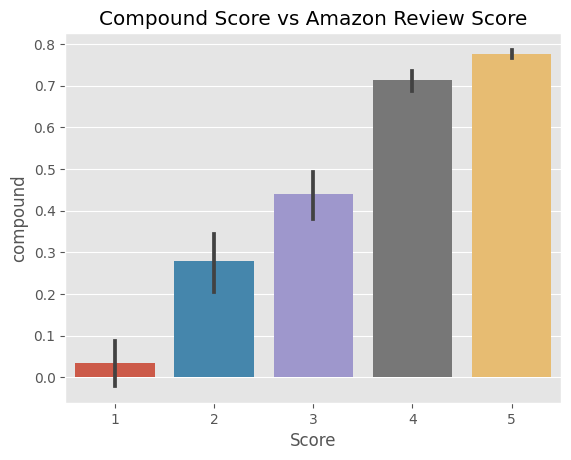

Index(['Review_ID', 'neg', 'neu', 'pos', 'compound', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [21]:
ax = sns.barplot(data = vaders, x = 'Score', y = "compound")
ax.set_title('Compound Score vs Amazon Review Score')
plt.show()
vaders.columns

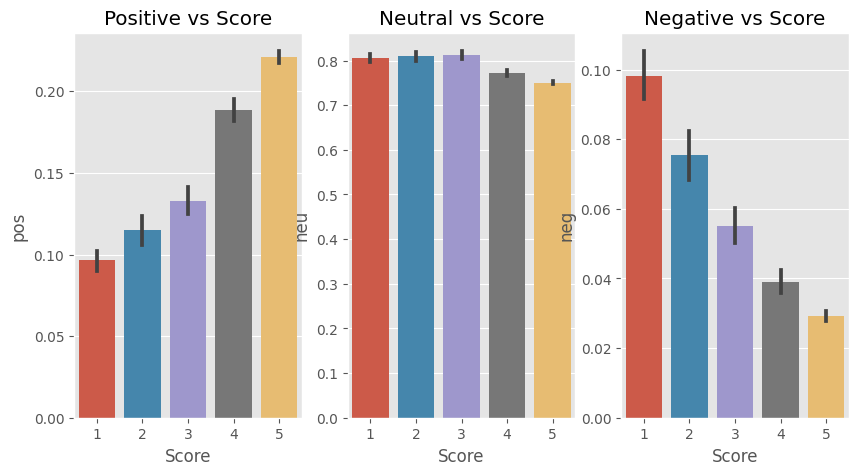

In [22]:
fig,axs = plt.subplots(1,3,figsize = (10,5))
sns.barplot(data = vaders,x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(data = vaders,x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data = vaders,x = 'Score', y = 'neg', ax = axs[2])
axs[0].set_title('Positive vs Score')
axs[1].set_title('Neutral vs Score')
axs[2].set_title('Negative vs Score')
plt.show()


## STEP 3 Roberta Pretrained Model 



In [23]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [24]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

2025-12-12 16:33:59.243065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765557239.489932      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765557239.566290      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [26]:
# run exmaple on robertea 
encoded_text = tokenizer(example,return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}



model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [27]:
def polarityroberta(example):
    encoded_text = tokenizer(example,return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
    }
    return scores_dict


In [ ]:
res = {} 
for i,row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row.Text
        myid = row.Id
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key,value in vader_result.items():
            vader_result_rename[f'vader_{key}'] = value
        roberta_result = polarityroberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'error on id{myid}')
        continue
    

  0%|          | 0/5000 [00:00<?, ?it/s]

error on id83
error on id187
error on id529
error on id540
error on id746
error on id863
error on id1053
error on id1070
error on id1156
error on id1321
error on id1375
error on id1498
error on id1575
error on id1796
error on id1826
error on id2169
error on id2248
error on id2476
error on id2492
error on id2584
error on id2610
error on id2897
error on id2898
error on id2902
error on id2928
error on id2942
error on id2944
error on id2947
error on id2948
error on id3022
error on id3023
error on id3025
error on id3306
error on id3788
error on id3969
error on id4107
error on id4110
error on id4307
error on id4316
error on id4408
error on id4553
error on id4583


In [ ]:
both

In [30]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns = {'index' : "Review_ID"} )
results_df = pd.merge(
    results_df,
    df,
    left_on = 'Review_ID',
    right_on = 'Id',
    how = 'inner'
).drop(columns = 'Id')

results_df

,Review_ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,4996,0.025,0.883,0.092,0.7193,0.100337,0.300059,0.599604,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4952,4997,0.026,0.764,0.210,0.9846,0.019922,0.092043,0.888035,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4953,4998,0.097,0.827,0.076,-0.0554,0.602979,0.333857,0.063164,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4954,4999,0.154,0.637,0.209,0.9078,0.011522,0.044735,0.943743,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


## CREATING A TRUE SENTIMENT COLUMN

In [31]:
results_df.columns
results_df.Score.unique()
def score_to_sentiment(Score):
    if Score >= 4:
        return 'positive'
    elif Score == 3:
        return "neutral"
    else:
        return 'negative'
results_df['true_sentiment'] = results_df["Score"].apply(score_to_sentiment)
results_df.true_sentiment


0       positive
1       negative
2       positive
3       negative
4       positive
          ...   
4951    negative
4952    negative
4953     neutral
4954    positive
4955    positive
Name: true_sentiment, Length: 4956, dtype: object

## STEP4. LOGISTIC REGRESION MODEL 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [33]:
tfidf_logreg = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ("clf", LogisticRegression(max_iter=500)),
])


In [34]:
tfidf_logreg.fit(results_df["Text"], results_df["true_sentiment"])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('clf', LogisticRegression(max_iter=500))])

In [35]:
results_df["logreg_pred"] = tfidf_logreg.predict(results_df["Text"])

results_df[['logreg_pred','Text','true_sentiment']]

,logreg_pred,Text,true_sentiment
0,positive,I have bought several of the Vitality canned d...,positive
1,negative,Product arrived labeled as Jumbo Salted Peanut...,negative
2,positive,This is a confection that has been around a fe...,positive
3,positive,If you are looking for the secret ingredient i...,negative
4,positive,Great taffy at a great price. There was a wid...,positive
...,...,...,...
4951,positive,I really wanted to like these.<br /><br />Firs...,negative
4952,positive,I was not impressed with these cookies when I ...,negative
4953,positive,The cookies came sealed and seem to be high qu...,neutral
4954,positive,"These taste very good, but aren't like the BES...",positive


## CALCULATING PRECISON,RECALL,F1- SCORE FOR MODELS 
1. Convert ROBERTA AND VADER model results to non numeric
2. Create a get_metrics function to collect scores save as dictonary
3. Convert Dictionary to DF
4. Compare


In [36]:
df_compare = results_df.copy()
df_compare.columns

0.639367372881356

In [37]:
# creating label based off of Vader Compound Score 
df_compare['vader_label'] = df_compare['vader_compound'].apply(lambda x : 'positive' if x >= 0.05
                                                      else 'negative' if x <= -0.05
                                                      else 'neutral')

In [38]:
# Creating lable based off of max probs for Roberta 
def max_prob(row):
    probs = [row["roberta_neg"], row["roberta_neu"], row["roberta_pos"]]
    labels = ["negative", "neutral", "positive"]
    return labels[probs.index(max(probs))]
df_compare['roberta_label'] = df_compare.apply(max_prob,axis = 1)


In [39]:
# Lets Create Our Get Metrics function 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def get_metrics(y_true, y_pred):
    return {
        "precision": precision_score(y_true, y_pred, average='weighted'),
        "recall": recall_score(y_true, y_pred, average='weighted'),
        "f1-score": f1_score(y_true, y_pred, average='weighted'),
        "accuracy": accuracy_score(y_true, y_pred)
    }


In [40]:
# Put our metrics into a dictionayr 
metrics_map = {
    "VADER": get_metrics(df_compare["true_sentiment"], df_compare["vader_label"]),
    "RoBERTa": get_metrics(df_compare["true_sentiment"], df_compare["roberta_label"]),
    "Logistic Regression": get_metrics(df_compare["true_sentiment"], df_compare["logreg_pred"])
}

In [41]:
# Transform our dictionary into a DataFrame for easier use and do a Tranpose transformation
metrics_df = pd.DataFrame(metrics_map).T
metrics_df


,precision,recall,f1-score,accuracy
VADER,0.749548,0.797619,0.766053,0.797619
RoBERTa,0.843790,0.852098,0.847707,0.852098
Logistic Regression,0.885876,0.876715,0.850262,0.876715
